In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
# import dash
import plotly.graph_objs as go

# code to set option to display all columns taken from this article: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)

#setting color palette
sns.set_palette('icefire')

### Data Visualizations

### Project Contents:
|Name|Description|
|---|---|
|1_EDA_Cleaning|Cleans and merges data from 3 sources. Initial EDA.|
|2_Case_Studies|A closer look at a few countries.|
|3_Classification Model|Builds various classification models.|
|4_Visualizations|A visual exploration of the data.|
|data|folder containing csv files of data used|
|streamlit|folder containing streamlit.py file, folder with streamlit images, folder with streamlit data files|


You are currently in notebook 4_visualizations. 


#### Notebook summary: 
Below there are various visualizations to get a better sense of state response in general,and by type of protest.

In [2]:
df = pd.read_csv('../data/transformed/mm_wgi_fiw.csv')

In [3]:
df.columns

Index(['country_name', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'protesterviolence', 'participants_category', 'stateresponse1',
       'start_date', 'end_date', 'duration', 'duration_int',
       'labor wage dispute', 'land farm issue', 'police brutality',
       'political behavior, process', 'price increases, tax policy',
       'removal of politician', 'social restrictions', 'CC.EST', 'GE.EST',
       'PV.NO.SRC', 'RL.EST', 'VA.EST', 'fiw_status'],
      dtype='object')

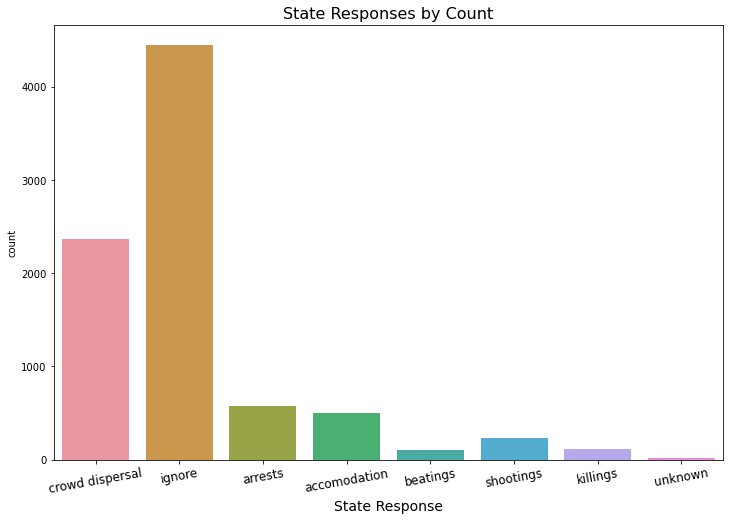

In [4]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="stateresponse1", data=df)
plt.title(f'State Responses by Count', fontsize=16)
plt.xlabel('State Response', fontsize=14)
plt.xticks(fontsize=12, rotation=10);

Text(0.5, 1.0, 'Protester Violence')

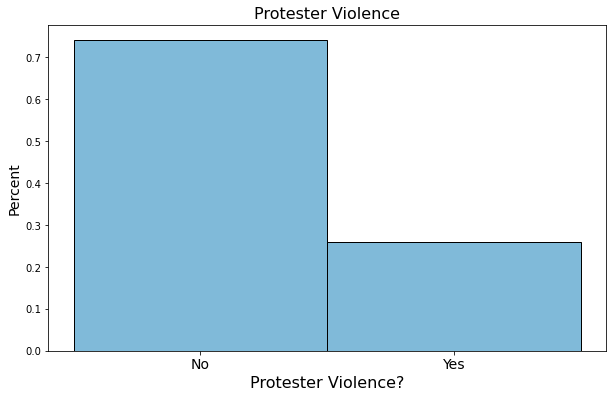

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['protesterviolence'], stat='probability', bins=2)
plt.xticks(ticks=[.25, .75], labels = ['No', 'Yes'], fontsize=14)
plt.xlabel('Protester Violence?', fontsize=16)
plt.ylabel('Percent', fontsize=14)
plt.title('Protester Violence', fontsize=16)

In [6]:
response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',
'land farm issue', 'police brutality', 'political behavior, process',
'price increases, tax policy', 'removal of politician',
'social restrictions'].sum()

<ipython-input-6-fa79bfffd88f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


In [7]:
#state response by protesters' demands
response_by_demand

,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions
stateresponse1,,,,,,,
accomodation,102,39,31,267,59,88,25
arrests,40,24,41,431,54,51,27
beatings,11,6,10,62,8,12,6
crowd dispersal,299,113,279,1790,251,520,78
ignore,631,215,272,3191,364,574,297
killings,2,6,16,83,11,15,9
shootings,15,6,37,162,20,50,3
unknown,5,1,1,7,2,2,2


In [8]:
def barplot_reponse_by_demand(df, demand):
    response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',
   'land farm issue', 'police brutality', 'political behavior, process',
   'price increases, tax policy', 'removal of politician',
   'social restrictions'].sum()
    plt.figure(figsize=(10,6))
    sns.barplot(x = response_by_demand.index, y= response_by_demand[demand])
    plt.title(f'State Response: {demand}', fontsize=16)
    plt.xticks(rotation=20, fontsize=11)
    plt.xlabel('State Response', fontsize=12)
    plt.ylabel('Protest Count', fontsize=12)

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


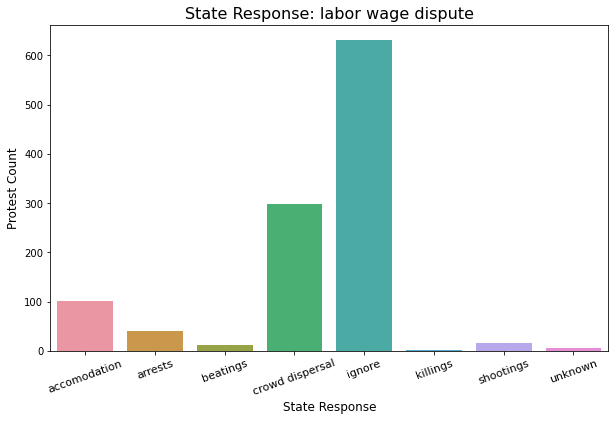

In [9]:
barplot_reponse_by_demand(df,'labor wage dispute')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


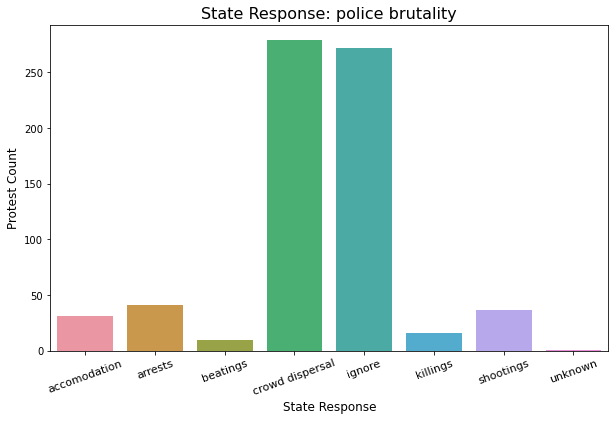

In [10]:
barplot_reponse_by_demand(response_by_demand,'police brutality')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


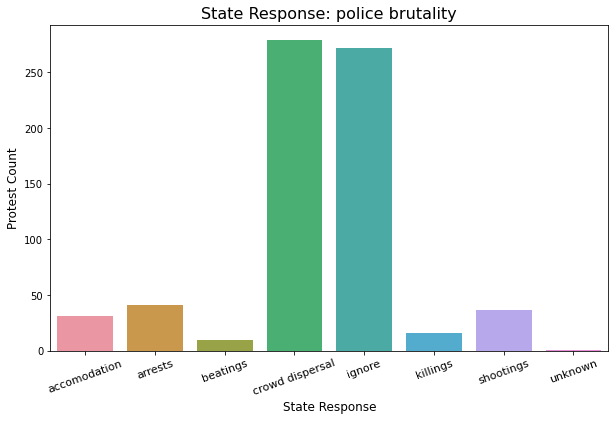

In [11]:
barplot_reponse_by_demand(response_by_demand,'police brutality')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


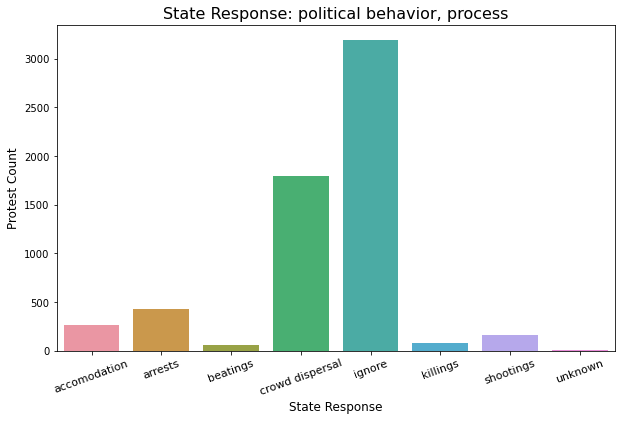

In [12]:
barplot_reponse_by_demand(response_by_demand,'political behavior, process')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


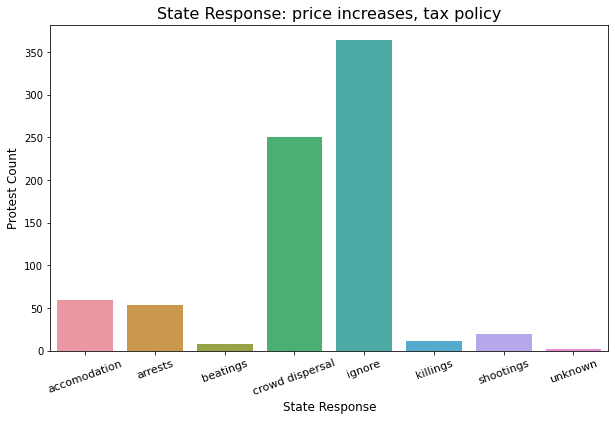

In [13]:
barplot_reponse_by_demand(response_by_demand,'price increases, tax policy')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


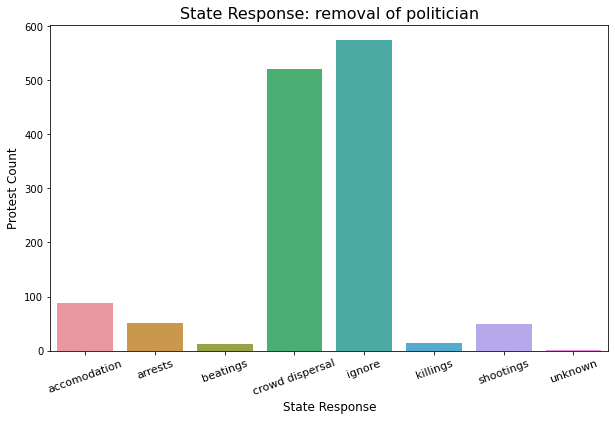

In [14]:
barplot_reponse_by_demand(response_by_demand,'removal of politician')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


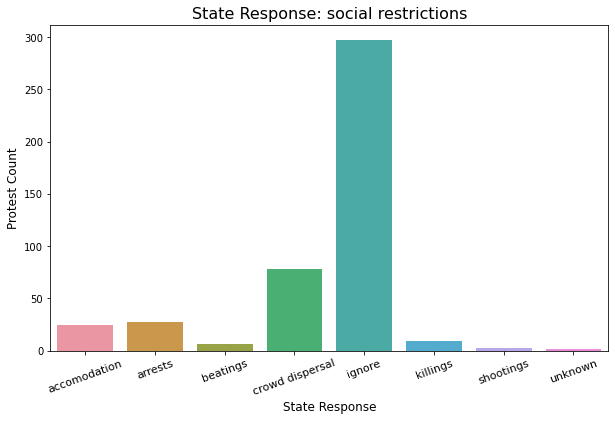

In [15]:
barplot_reponse_by_demand(response_by_demand,'social restrictions')

In [16]:
df.columns

Index(['country_name', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'protesterviolence', 'participants_category', 'stateresponse1',
       'start_date', 'end_date', 'duration', 'duration_int',
       'labor wage dispute', 'land farm issue', 'police brutality',
       'political behavior, process', 'price increases, tax policy',
       'removal of politician', 'social restrictions', 'CC.EST', 'GE.EST',
       'PV.NO.SRC', 'RL.EST', 'VA.EST', 'fiw_status'],
      dtype='object')

In [17]:
def plot_response_by_demand_by_fiw_score(df=df, score_cat='PF', demand='labor wage dispute'):
    output_df = df[df['fiw_status'] == score_cat]
    barplot_reponse_by_demand(output_df,demand)
    

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


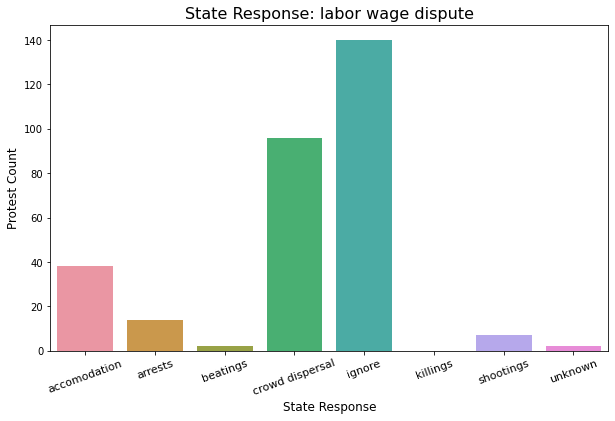

In [18]:
plot_response_by_demand_by_fiw_score(df, 'PF')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


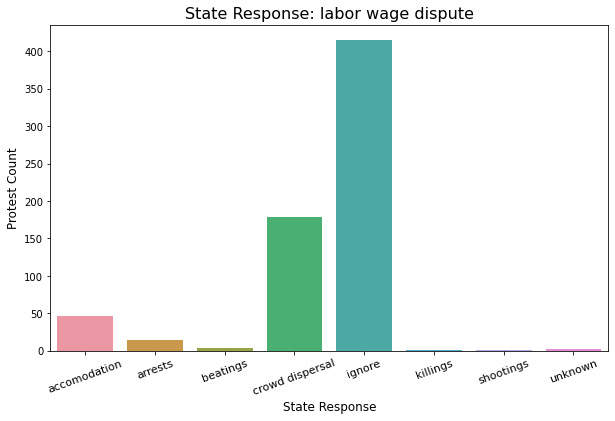

In [19]:
plot_response_by_demand_by_fiw_score(df, 'F')

<ipython-input-8-3651a2941c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  response_by_demand = df.groupby(by = 'stateresponse1')['labor wage dispute',


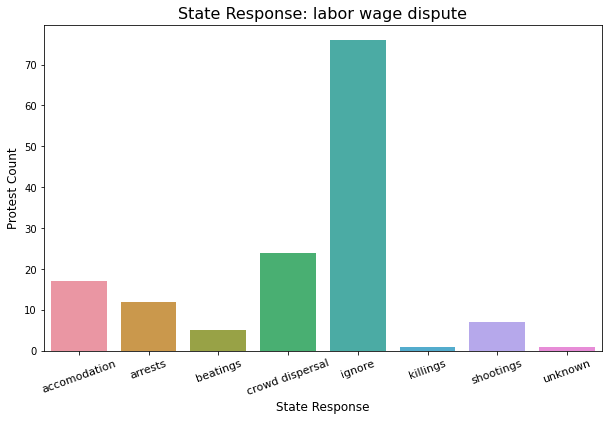

In [20]:
plot_response_by_demand_by_fiw_score(df, 'NF')

Text(0.5, 1.0, 'State Response: Labor Wage Dispute')

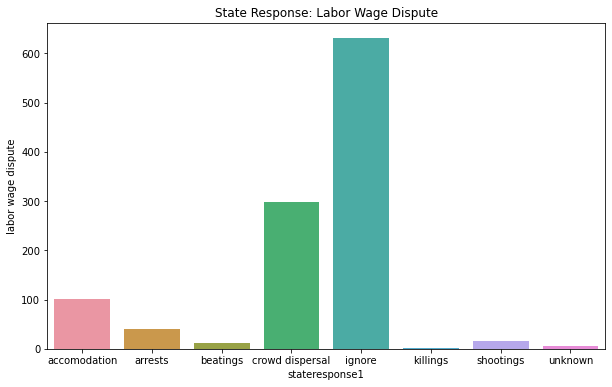

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x = response_by_demand.index, y= response_by_demand['labor wage dispute'])
plt.title('State Response: Labor Wage Dispute')

In [22]:
df.groupby(by = 'stateresponse1')['CC.EST', 'GE.EST', 'PV.NO.SRC', 'RL.EST',
       'VA.EST', 'fiw_status'].median()

<ipython-input-22-544b4d6eba37>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by = 'stateresponse1')['CC.EST', 'GE.EST', 'PV.NO.SRC', 'RL.EST',


,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST
stateresponse1,,,,,
accomodation,-0.514938,-0.301507,8.0,-0.488233,-0.218955
arrests,-0.536476,-0.193249,8.0,-0.651298,-0.883594
beatings,-0.766187,-0.554849,7.0,-0.754716,-1.083014
crowd dispersal,-0.561732,-0.413859,8.0,-0.488233,-0.308442
ignore,-0.300416,0.007411,8.0,-0.170176,0.006508
killings,-0.804220,-0.778967,7.0,-0.715842,-0.763609
shootings,-1.007903,-0.964174,7.0,-0.974337,-1.013889
unknown,-0.344728,-0.379961,7.0,-0.676570,-0.143551


In [24]:
df_2006 = df[df['year'] == 2006]

In [25]:
data = {
    'type' : 'choropleth',
    'locations' : df['country_name'],
    'locationmode':'country names',
    'colorscale' : 'viridis',
    'z':df['CC.EST']}

In [26]:
map = go.Figure(data=[data])
plotly.offline.plot(map)

'temp-plot.html'

In [27]:
def time_series_by_country(df = df, country_or_region = 'country', place = 'Mali', agg_method = 'sum', interval = 'YS'):

    '''
    A function to downsample the full dataframe to view data by country. 
    Date range will include all years for which data is available for a specified country. 
    Input:
        * a dataframe - defaults to 'df'
        * specify country or region - in order to view data by region
        * place - country or region name
        * agg_method - aggregation method for resampling. defaults to 'sum'. 'mean' also recommended. 
        * interval - 'YS': annual / 'MS': monthly 
        
    '''
    try:
        # generate downsamples dataframe based on country/region selection
        if country_or_region == 'country':
            output_df = df[df['country_name'] == place.title()]

        elif country_or_region == 'region':
            output_df = df[df['region'] == place.title()]


        #set index to date_time based on protest startdate
        output_df = output_df.sort_values(by='start_date')
        output_df.set_index(pd.DatetimeIndex(output_df['start_date']), inplace=True)

        #specify date range if desired
        start_date = str(output_df.index.min())[:4]
        end_date = str(output_df.index.max())[:4]
        output_df = output_df.loc[start_date:end_date]

        # resample to look at data based on regular intervals
        output_df.resample(interval).agg(agg_method)

        output_df.drop(columns = ['year', 'end_date', 'ccode'], inplace=True)
        return output_df

    except: 

        print(f'We don\'t have enough data to fulfill your request for {place}. Please check your spelling, or try another location.')


